In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets #in thousands of dollars

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [5]:
#Here, we normalize the train data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

#Note that you should never use any quantity computed from the test data, even for data normalization!
test_data -= mean
test_data /= std

In [6]:
#Prevent Tensorflow from allocating my entire GPU
import keras

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [26]:
from keras import models
from keras import layers

#A method to build the model (since we are using the same model multiple times)

model = models.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(train_data.shape[1],)))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
#Test our model

history = model.fit(train_data, train_targets, validation_split = 0.2, epochs=500, batch_size=1, verbose=1)

history_dict = history.history
history_dict.keys()

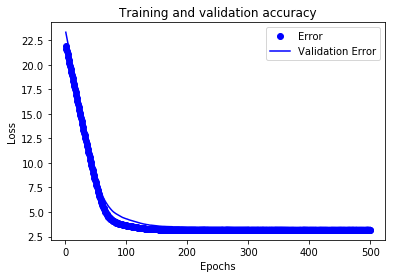

In [28]:
#Let us now plot our training history
import matplotlib.pyplot as plt

plt.clf()
error_values = history_dict['mean_absolute_error']
val_error_values = history_dict['val_mean_absolute_error']

epochs = range(1, len(error_values) + 1)
plt.plot(epochs, error_values, 'bo', label = 'Error')
plt.plot(epochs, val_error_values, 'b', label = 'Validation Error')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [31]:
# Evaluate the model on the validation data
loss, mae = model.evaluate(test_data, test_targets, verbose=1)
loss, mae

102/102 [==============================] - 0s 39us/step


(19.72368569467582, 3.168687371646657)